# **Waze app Regression Modeling Project**


# Introduction

Waze, a navigation app guides millions to their destinations safely and efficiently. While Waze is a travel companion for many, there is a constant challenge of keeping the users engaged to prevent churn - defined as when users stop using the app. Churn can have significant implications for the company's growth, and overall business performance.

The leadership at Waze is eager to determine factors that contribute to churn. By identifying the factors contributing to churn, Waze can develop targeted strategies to retain users.

Follow me as I prepare the data, build the model, unearth valuable insights into factors that affect churn, and interpret the model's results.


***PS. For a snapshot of the project, please refer to the*** [Executive Summary](https://docs.google.com/presentation/d/1jY30m-n4b7mGxhN6Iv4OcVEkMiJhx1iFkydBkaHfqhI/edit#slide=id.g24d11347f20_0_376)

### **This project has three parts**


**Part 1:** Exploratory Data Analysis (EDA)
- Importing the required data, libraries and performing EDA.

**Part 2:** Model Building and Evaluation
- Building a binomial regression model to predict churn and evaluating its performance using appropriate metrics.

**Part 3:** Interpreting Model Results
- Analyzing the model's outputs to identify key factors influencing churn.
- Summarizing findings & communicating  actionable insights to the leadership.

# **Part 1. Imports, data loading and Exploratory Data Analysis** 

In this section, I will initialize the Python environment with the necessary libraries required for building a bionomial regression model. Subsequently, I will load the dataset and convert it into a format conducive to data manipulation and analysis. Additionally, an initial analysis will be conducted to comprehend the underlying characteristics of the dataset.

In [1]:
# Packages for numerics 
import numpy as np
import pandas as pd


# Packages for visualization
import seaborn as sns
import matplotlib.pyplot as plt


# Packages for Logistic Regression, Classification Report & Confusion Matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [2]:
# Loading the dataset 
df = pd.read_csv('waze_dataset.csv')

In [3]:
# Verifying and validating that the dataset was loaded properly
print(f'The number of rows in the dataset are: {df.shape[0]}')
print(f'The number of columns in the dataset are: {df.shape[1]}')

The number of rows in the dataset are: 14999
The number of columns in the dataset are: 13


In [4]:
# Generating the top five rows of the dataframe to get a preliminary understanding of the dataset
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [5]:
# Generating Summary Statistics for the numerical variables in the dataset
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


In [6]:
# Checking for misssing values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [7]:
# Checking the class balance of the dependent (target) variable, "label".
df['label'].value_counts(normalize=True)

retained    0.822645
churned     0.177355
Name: label, dtype: float64

***For a comprehensive Exploratory Data Analysis (EDA) and detailed visualizations of the dataset, please refer to a previously compiled notebook***. [Please click on the following link for detailed EDA & visualizations](https://github.com/3quraishi/Waze-EDA-and-User-Churn-Analysis/blob/main/Waze%20Portfolio%20Project.ipynb). In this current notebook, we will build upon that groundwork and build the binomial regression model.

# **Part 2. Model Building and Evaluation**



In [8]:
# Removing the ID column since we don't need this information for the analysis.
df = df.drop(columns=['ID'])

### Feature Engineering

Developing new features or transforming existing ones to enhance the model's ability to address the business problem effectively. These features may also align with stakeholder interests for actionable insights.

In [9]:
# Creating a new column, km_per_driving_day 
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']

# Calling .describe() on the new column
df['km_per_driving_day'].describe()

count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

In [10]:
# Converting infinite values to zero
df['km_per_driving_day'] = df['km_per_driving_day'].replace(np.inf, 0)

# Calling .describe() to confirm that it worked
df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

In [11]:
# Creating professional_driver column that is a 1 for users who had 60 or more drives and drove on 15+ days in the last month.
df['professional_driver'] = np.where(
    (df['drives'] >= 60) & (df['driving_days'] >= 15),  # Condition
    1,  # Value if condition is true
    0   # Value if condition is false
)

In [12]:
# Checking count of professionals and non-professionals
df['professional_driver'].value_counts()

# Calculating churn rate within each class
churn_rate = df.groupby('professional_driver')['label'].value_counts(normalize=True)* 100

# Displaying churn rates
print(churn_rate)

professional_driver  label   
0                    retained    80.120227
                     churned     19.879773
1                    retained    92.443730
                     churned      7.556270
Name: label, dtype: float64


In [13]:
# Dropping rows with missing data in the label column (these observations comprise less than 5% of the data)
df.dropna(subset=['label'], axis=0)

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day,professional_driver
0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,138.360267,1
1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone,1246.901868,0
2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,382.393602,0
3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,304.530374,0
4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,219.455667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,retained,60,55,207.875622,140,317,0,2890.496901,2186.155708,25,17,iPhone,170.029229,0
14995,retained,42,35,187.670313,2505,15,10,4062.575194,1208.583193,25,20,Android,203.128760,0
14996,retained,273,219,422.017241,1873,17,0,3097.825028,1031.278706,18,17,iPhone,182.225002,1
14997,churned,149,120,180.524184,3150,45,0,4051.758549,254.187763,6,6,iPhone,675.293092,0


#### **Imputing outliers**

Previously, I determined that several of the variables had clear signs of containing outliers (in the EDA stage):

* `sessions`
* `drives`
* `total_sessions`
* `total_navigations_fav1`
* `total_navigations_fav2`
* `driven_km_drives`
* `duration_minutes_drives`

For this analysis, I impute the outlying values for these columns and replace it with 95th percentile value.


In [14]:
# Listing columns to impute outliers
columns_with_outliers = [
    'sessions',
    'drives',
    'total_sessions',
    'total_navigations_fav1',
    'total_navigations_fav2',
    'driven_km_drives',
    'duration_minutes_drives'
]

# Iterating over each column and cap values at the 95th percentile
for col in columns_with_outliers:
    percentile_95 = df[col].quantile(0.95)                              # Calculating the 95th percentile for the column
    df[col] = np.where(df[col] > percentile_95, percentile_95, df[col]) # Replacing values greater than the 95th percentile

# Calling .describe() to verify changes
df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,professional_driver
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,76.568705,64.058204,184.031320,1749.837789,114.415228,27.214281,3939.632764,1789.647426,15.537102,12.179879,578.963113,0.172945
std,67.297958,55.306924,118.600463,1008.513876,124.686795,36.735583,2216.041510,1222.705167,9.004655,7.824036,1030.094384,0.378212
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000
25%,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,136.238895,0.000000
50%,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,272.889272,0.000000
75%,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,558.686918,0.000000
max,243.000000,201.000000,454.363204,3500.000000,424.000000,124.000000,8889.794236,4668.899349,31.000000,30.000000,15420.234110,1.000000


#### **Encoding categorical variables**

In [15]:
# Creating a binary, label2 column
df['label2'] = np.where(df['label'] == 'churned', 1, 0) # Assigning a 0 for all retained users & 1 for churned users

### **Determining whether assumptions for logistic regression have been met**


#### **Collinearity**

In [16]:
# Generating a correlation matrix
df.corr()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,professional_driver,label2
sessions,1.000000,0.996907,0.595796,0.006480,0.003123,0.009746,0.001425,-0.005364,0.024374,0.018518,-0.011099,0.443151,0.033695
drives,0.996907,1.000000,0.593945,0.006198,0.002307,0.010365,0.001789,-0.004763,0.023821,0.018036,-0.010609,0.443705,0.034528
total_sessions,0.595796,0.593945,1.000000,0.005328,0.002377,0.008061,-0.000835,-0.001456,0.015932,0.012568,-0.014563,0.254599,0.022467
n_days_after_onboarding,0.006480,0.006198,0.005328,1.000000,0.001232,-0.007468,-0.002852,-0.009140,-0.009725,-0.008563,0.011631,0.001364,-0.124711
total_navigations_fav1,0.003123,0.002307,0.002377,0.001232,1.000000,0.002467,-0.007898,0.002722,0.012176,0.011339,-0.002056,0.001135,0.051766
total_navigations_fav2,0.009746,0.010365,0.008061,-0.007468,0.002467,1.000000,0.003831,-0.000951,-0.003489,0.003197,0.004308,0.006892,0.014263
driven_km_drives,0.001425,0.001789,-0.000835,-0.002852,-0.007898,0.003831,1.000000,0.690996,-0.005620,-0.007816,0.343509,0.000219,0.020131
duration_minutes_drives,-0.005364,-0.004763,-0.001456,-0.009140,0.002722,-0.000951,0.690996,1.000000,-0.005852,-0.007585,0.238133,-0.010022,0.040527
activity_days,0.024374,0.023821,0.015932,-0.009725,0.012176,-0.003489,-0.005620,-0.005852,1.000000,0.947706,-0.397062,0.452947,-0.295190
driving_days,0.018518,0.018036,0.012568,-0.008563,0.011339,0.003197,-0.007816,-0.007585,0.947706,1.000000,-0.407633,0.468653,-0.286080


<AxesSubplot:>

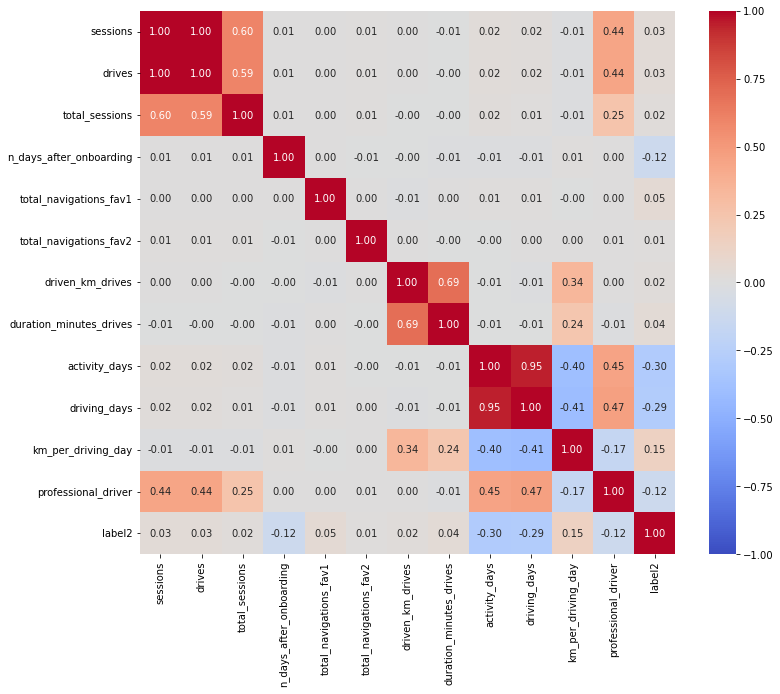

In [17]:
# Ploting a correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))  # Set the figure size
sns.heatmap(
    correlation_matrix,
    annot=True,         # Annotating each cell with the numeric value
    fmt=".2f",          # Formating the numbers to two decimal places
    cmap="coolwarm",    # Using the coolwarm colormap
    cbar=True,          # Displaying the color bar
    vmin = -1,          # Setting the minimum value of the color scale to -1 (strong negative correlation)
    vmax=1)             # Setting the maximum value of the color scale to 1 (strong positive correlation)


Variables that are multicolinear to each other are: 
`sessions` and `drives`: 1.0
`driving_days` and `activity_days`: 0.95

In [18]:
# Creating a new variable, device2
df['device2'] = np.where(df['device'] == 'Android', 0, 1) # Assigning 0 for Android and 1 for iPhone

In [19]:
# Isolating predictor variables (independent variables)
X = df.drop(columns = ['label', 'label2', 'device', 'sessions', 'driving_days'])

In [20]:
# Isolating target variable (dependent variable)
y = df['label2']

In [21]:
# Performing the train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,    # Using 20% of the data for testing
    random_state=42,  # Setting a random state for reproducibility
    stratify=y        # Stratifying split to ensure that the minority class appears in both train and test sets 
)

In [22]:
# Calling .head() on X_train
X_train.head()

,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,km_per_driving_day,professional_driver,device2
13490,41.0,193.805177,3423,424.0,124.0,1811.230633,1467.401184,21,150.935886,0,1
9318,31.0,108.045409,1550,78.0,44.0,1924.213637,1495.221262,10,641.404546,0,1
477,6.0,183.313599,749,161.0,21.0,2058.202902,994.834866,14,294.028986,0,1
8746,163.0,334.877779,1394,0.0,29.0,3114.690598,888.966159,0,0.000000,0,1
6801,78.0,179.534419,2081,205.0,59.0,6627.447755,304.741889,3,0.000000,0,1


In [23]:
# Instantiating a logistic regression model
model = LogisticRegression(penalty='none', max_iter=400, random_state=42)

# Fitting the logistic regression model
model.fit(X_train, y_train)

LogisticRegression(max_iter=400, penalty='none', random_state=42)

In [24]:
# Printing model coefficients
pd.Series(model.coef_[0], index=X.columns)

drives                     0.002360
total_sessions            -0.000050
n_days_after_onboarding   -0.000391
total_navigations_fav1     0.001147
total_navigations_fav2     0.001003
driven_km_drives          -0.000037
duration_minutes_drives    0.000125
activity_days             -0.102930
km_per_driving_day         0.000009
professional_driver       -0.001390
device2                   -0.001126
dtype: float64

In [25]:
# Calling the model's intercept attribute to get the intercept of the model.
print("Intercept:", model.intercept_)

Intercept: [-0.00179004]


#### **Checking for linear relationship between X and the logit of y**

Verifying the linear relationship between X and the estimated log odds (known as logits) by making a regplot.

In [26]:
# Getting the predicted probabilities of the training data
training_probabilities = model.predict_proba(X_train)

In [27]:
# Copying the X_train dataframe and assigning it to logit_data
logit_data = X_train.copy()

# Extracting probabilities of the positive class from the predicted probabilities
churn_probabilities = training_probabilities[:, 1]

# Calculating the log-odds (logit) for the positive class using the formula: log(p / (1 - p)).
logit_data['logit'] = np.log(churn_probabilities / (1 - churn_probabilities))

Plotting a regplot where the x-axis represents an independent variable and the y-axis represents the log-odds of the predicted probabilities.

In an exhaustive analysis, this would be plotted for each continuous or discrete predictor variable. However, here we are considering only driving_days.

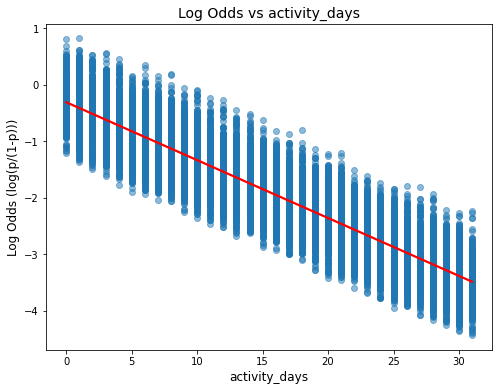

In [28]:
# Selecting the independent variable to analyze its relationship with log-odds
independent_variable = 'activity_days'

# Creating the regplot
plt.figure(figsize=(8, 6))
sns.regplot(
    x=logit_data[independent_variable], # Independent variable on x-axis
    y=logit_data['logit'],              # Log-odds on y-axis
    scatter_kws={'alpha': 0.5},         # Adjust scatterplot transparency
    line_kws={'color': 'red'}           # Regression line color
)

# Adding labels,title and showing the plot
plt.title(f"Log Odds vs {independent_variable}", fontsize=14)
plt.xlabel(independent_variable, fontsize=12)
plt.ylabel("Log Odds (log(p/(1-p)))", fontsize=12)
plt.show()

Linearity Check:The red regression line suggests a negative linear relationship between activity_days and the log-odds.

# **Part 3. Results and Evaluation**

In [29]:
# Generating predictions on X_test
test_probabilities = model.predict_proba(X_test)

# Generating predicted classes for the test set
test_predictions = model.predict(X_test)

In [30]:
# Scoring the model (accuracy) on the test data & printing it
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy on Test Set: {accuracy:.2f}")

Model Accuracy on Test Set: 0.83


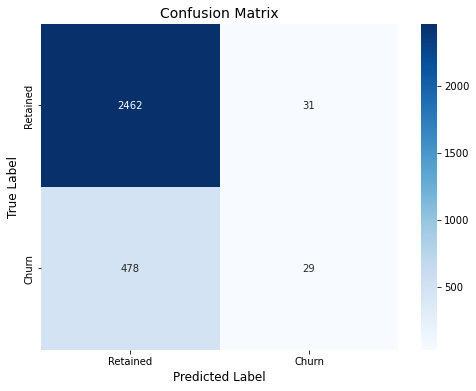

In [31]:
# Generating predictions for the test set
y_preds = model.predict(X_test)

# Computing the confusion matrix
cm = confusion_matrix(y_test, y_preds)

# Displaying the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Retained', 'Churn'], yticklabels=['Retained', 'Churn'])
plt.title('Confusion Matrix', fontsize=14)     # Adding the title to the plot
plt.xlabel('Predicted Label', fontsize=12)     # Adding label for x-axis
plt.ylabel('True Label', fontsize=12)          # Adding label for y-axis
plt.show()

In [32]:
# Calculating precision & printing it
TN, FP, FN, TP = cm.ravel()
precision = TP / (TP + FP)
print(f"Precision: {precision:.2f}")

Precision: 0.48


In [33]:
# Calculating recall & printing it
recall = TP / (TP + FN)
print(f"Recall: {recall:.2f}")

Recall: 0.06


In [34]:
# Creating a classification report & printing it
report = classification_report(y_test, y_preds, target_names=['Retained', 'Churn'])
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

    Retained       0.84      0.99      0.91      2493
       Churn       0.48      0.06      0.10       507

    accuracy                           0.83      3000
   macro avg       0.66      0.52      0.50      3000
weighted avg       0.78      0.83      0.77      3000



The model has a very low recall, which means that it makes a lot of false negatives, where actual churners are incorrectly predicted as retained.

#### Plotting feature importance 

The coefficients represent the trained model's output, highlighting the relative importance and direction (positive or negative) of each feature in predicting the target variable. This visualization forms an essential part of interpreting the model's results and understanding which factors drive the predictions.

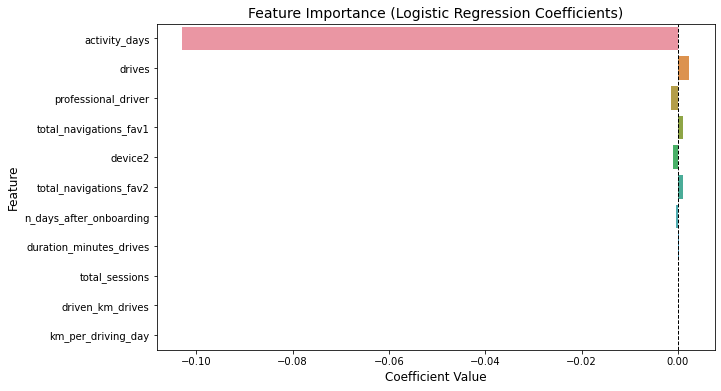

In [35]:
# Plotting feature importance: 
# Combining feature names and their corresponding coefficients into a list
coefficients = list(zip(X_train.columns, model.coef_[0]))

# Creating a DataFrame to store features and their coefficients for easier manipulation
coefficients_df = pd.DataFrame(coefficients, columns=['Feature', 'Coefficient'])

# Adding a new column for the absolute values of coefficients to assess their magnitude
coefficients_df['Abs_Coefficient'] = coefficients_df['Coefficient'].abs()

# Sorting the DataFrame by the absolute values of coefficients in descending order
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

# Plotting the feature importance using a horizontal bar plot
plt.figure(figsize=(10, 6))                                                      # Setting the figure size
sns.barplot(x='Coefficient', y='Feature', data=coefficients_df)                  # Creating the bar plot
plt.title('Feature Importance (Logistic Regression Coefficients)', fontsize=14)  # Adding a title to the plot
plt.xlabel('Coefficient Value', fontsize=12)                                     # Labeling the x-axis
plt.ylabel('Feature', fontsize=12)                                               # Labeling the y-axis
plt.axvline(0, color='black', linestyle='--', linewidth=1)                       # Adding a vertical line at 0 for visual separation
plt.show()                                                                       # Displaying the plot


# Communicating insights with stakeholders

   - **Professional drivers show lower churn rates.**


   - **Drivers with more activity days are far less likely to churn.**


   - **While the model achieves 83% accuracy, it struggles with identifying churners (6% recall).**


# Next steps

➡️ Add additional features (e.g., engagement metrics) to improve the model’s ability to predict churn.

➡️ Explore alternative models (e.g., Random Forest or Gradient Boosting) to improve churn prediction performance.

➡️ Test personalized engagement strategies (e.g., daily streaks or targeted notifications) to increase activity days and drive retention.

➡️ Address class imbalance using techniques like oversampling churners, undersampling retained users, or applying class weights during model training.